In [3]:
import pandas as pd
import folium

In [4]:
cycle_df = pd.read_csv("cycle_place.csv")#https://catalog-data.city.kanazawa.ishikawa.jp/dataset/172014-machinori-port/resource/e0848c0d-f89a-476c-9854-606a6ab2a22c
cycle_df.head(3)

,_id,施設ID,地域,緯度,経度,名称,概略,郵便番号,住所,電話番号,Fax番号,E-mail,利用可能曜日,開始時間,終了時間,利用可能日時特記事項,料金,備考,リンク,電話受付,画像
0,1,12699,金沢市,36.577185,136.647628,金沢駅ポート,「まちのり」はどこでも借りられ、どこでも返すことができるシェアサイクルサービスです。観光はも...,NaN,ＪＲ金沢駅高架下通路,076-255-1747,NaN,NaN,日月火水木金土,00:00,23:59,NaN,"●「１回会員」 最初の30分 165円／回\n●「月額会員」 基本料金 1,650円／月 最...",NaN,http://www.machi-nori.jp/,9:00～18:00,http://infra-media.city.kanazawa.ishikawa.jp/i...
1,2,12700,金沢市,36.576554,136.649842,金沢駅東ポート,「まちのり」はどこでも借りられ、どこでも返すことができるシェアサイクルサービスです。観光はも...,NaN,市営本町２丁目自転車駐車場,076-255-1747,NaN,NaN,日月火水木金土,00:00,23:59,NaN,"●「１回会員」 最初の30分 165円／回\n●「月額会員」 基本料金 1,650円／月 最...",NaN,http://www.machi-nori.jp/,9:00～18:00,http://infra-media.city.kanazawa.ishikawa.jp/i...
2,3,12701,金沢市,36.573312,136.654419,武蔵ポート,「まちのり」はどこでも借りられ、どこでも返すことができるシェアサイクルサービスです。観光はも...,NaN,市営武蔵暫定自転車駐車場,076-255-1747,NaN,NaN,日月火水木金土,00:00,23:59,NaN,"●「１回会員」 最初の30分 165円／回\n●「月額会員」 基本料金 1,650円／月 最...",NaN,http://www.machi-nori.jp/,9:00～18:00,http://infra-media.city.kanazawa.ishikawa.jp/i...


In [5]:
cycle_df.shape

(66, 21)

In [6]:
kanko = pd.read_csv('kanazawa_kanko.csv')#https://www4.city.kanazawa.lg.jp/data/open/cnt/3/24011/1/shisetsu_kankou.csv?20211026144846
kanko.head(3)

,ID,地域,緯度,経度,ジャンル1,サブジャンル1,ジャンル2,サブジャンル2,ジャンル3,サブジャンル3,名称,概略,郵便番号,住所,電話番号,Fax番号,E-mail,開館時間,休館日,料金,備考,リンク
0,491,金沢市,36.571341,136.659366,観光,美術館・博物館,NaN,NaN,NaN,NaN,尾張町老舗交流館,一般に無料開放されている旧商家を復元した大正浪漫の建物。,920-0902,金沢市尾張町1-11-11,076-234-6666,076-234-6666,shinise@owaricho.or.jp,午前9時から午後5時まで,火曜日、年末年始,無料,NaN,http://www.owaricho.or.jp/mda.php?url=shinise
1,492,金沢市,36.569673,136.670574,観光,歴史・文化施設,NaN,NaN,NaN,NaN,泉鏡花句碑,金沢の三文豪の一人・泉鏡花の文学碑。卯辰山への登り口の脇にひっそりと建っており、幼い頃母を失...,920-0832,金沢市卯辰山自然公園,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,493,金沢市,36.573068,136.667921,観光,歴史・文化施設,観光,寺社,NaN,NaN,卯辰山山麓寺院群,金沢市内にある三寺院群の一つで、国の重要伝統的建造物群保存地区。卯辰山のふもとに約50の寺院...,920-0831,金沢市東山 ほか,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
kanko.shape

(59, 22)

In [8]:
mapkanazawa = folium.Map([36.5780818, 136.6478206],zoom_start = 12)
for i in range(66):
     folium.Marker(location=[cycle_df['緯度'][i], cycle_df['経度'][i]], popup="自",icon=folium.Icon(color='red', icon = 'eye-open')).add_to(mapkanazawa)
for i in range(59):
         folium.Marker(location=[kanko['緯度'][i], kanko['経度'][i]], popup="観",icon=folium.Icon(color='blue')).add_to(mapkanazawa)
mapkanazawa

In [9]:
#金沢市中心部が存在する東経136.6,北緯36.5度が入るような緯度経度１度の平面を考えると，緯度1度当たり110.959kｍ，経度1度当たり90.163kmとなる.

In [10]:
#各観光施設から最も近いサイクルポートまでの距離のリストを作成
ido1 = 110959
keido1 = 90163
dis_lis = []
for i in range(59):
    kanko_ido,kanko_keido = kanko['緯度'][i], kanko['経度'][i]#観光施設の緯度経度
    dis = 10**9#距離が短いもので随時更新していく.初期値を大きな数字にしておく．
    for j in range(66):
        cy_ido,cy_keido = cycle_df['緯度'][j], cycle_df['経度'][j]#サイクルポートの緯度経度
        diff_ido = abs(kanko_ido - cy_ido)
        diff_keido = abs(kanko_keido - cy_keido)
        if dis > ((diff_ido*ido1)**2 + (diff_keido*keido1)**2) ** 0.5:
            dis =  ((diff_ido*ido1)**2 + (diff_keido*keido1)**2) ** 0.5
    dis_lis.append(dis)
print(dis_lis)

[223.41603792208315, 344.69128080589275, 231.98906491509786, 225.92072497429348, 150.9730222592526, 134.38049627415228, 353.4274115947163, 184.38603930318587, 184.18390401701967, 773.3574216453923, 915.9399647761658, 125.32852479199222, 72.51163584339842, 1779.8124616873126, 323.53073530288736, 117.37690084768114, 97.21619535889782, 147.3882287735391, 1377.0949283236914, 200.0380329288648, 210.8179335380291, 986.6655294222326, 496.2362033748749, 140.51062440146558, 519.7236613674417, 9862.51963140304, 67.78669690759497, 277.4716050556299, 480.19627286549087, 287.5321603447816, 331.82568940646405, 301.1799127185071, 380.74136617921243, 2.8417085658461976, 48.45263387037468, 18.730836215758835, 9837.68323336398, 91.69462227570354, 82.0474687399009, 10.655740663192216, 122.59354757948856, 414.4455500270653, 86.4277443195763, 214.11795515588875, 44.64895435112549, 104.0032778696564, 9398.711172904592, 106.44207178732796, 69.92893620300555, 754.6852068953417, 8682.160796662169, 99.706102835

In [11]:
import numpy as np
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib

     |████████████████████████████████| 4.1 MB 5.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=57774b5173670217ff691b6442a82c4b184c036fbf95d31b51bb2fe50f9d252c
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


Text(0.5, 0, '観光施設から最も近いサイクルポートまでの距離(m)')

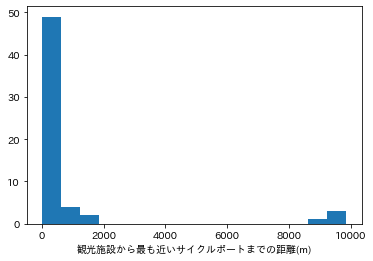

In [12]:
plt.hist(dis_lis, bins=16)
plt.xlabel("観光施設から最も近いサイクルポートまでの距離(m)")

In [13]:
#明らかに自転車で向かうことを想定していない8㎞以上のデータを除いて考える．
for i in dis_lis:
    if i >=  8000:
        dis_lis.remove(i)

Text(0.5, 0, '観光施設から最も近いサイクルポートまでの距離(m)')

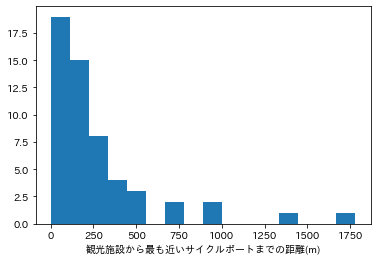

In [14]:
plt.hist(dis_lis, bins = 16)
plt.xlabel("観光施設から最も近いサイクルポートまでの距離(m)")

In [15]:
#観光地とサイクルポートの距離の統計的な情報
dis = np.array(dis_lis)
print("mean : ", np.mean(dis))
print("median : ", np.median(dis))
print("max : ", np.max(dis))

mean :  283.81541333830324
median :  176.46619289916342
max :  1779.8124616873126


In [16]:
print(np.percentile(dis,85))

473.62120058164817


In [17]:
#85%程度の観光施設がサイクルポートから500ｍ以内に配置されている．